<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Stastical/kriging_regression_example_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 7.7 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565155 sha256=c1038711f67ea686675401e56de03cef186902d1572fda879c22c24f87d9786f
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=7f2cc73ee9b858d9b4786c869c72719b91968a6c4749d33f621571224390018c
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


Les paramètres par défaut (avant optimisation) du noyau (kernel) sont : variance = 1.0, échelle = 1.0
La variance du bruit (cas homoscédasticité) = 1.0


GP_regression.,value,constraints,priors
Mat52.variance,1.0,+ve,
Mat52.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 /usr/local/lib/python3.7/dist-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = 10.588396098903514
Optimization restart 2/10, f = 10.588396101575851
Optimization restart 3/10, f = 10.588396099638116
Optimization restart 4/10, f = 10.588396101502319
Optimization restart 5/10, f = 10.588396098803877
Optimization restart 6/10, f = 10.588396096782446
Optimization restart 7/10, f = 10.588396099755963
Optimization restart 8/10, f = 10.588396098657878
Optimization restart 9/10, f = 10.588396102048819
Optimization restart 10/10, f = 10.588396100262228
r^2 score = 0.9999509300122208
MAE = 0.030090664537561818
MSQE = 0.0016354320131574198


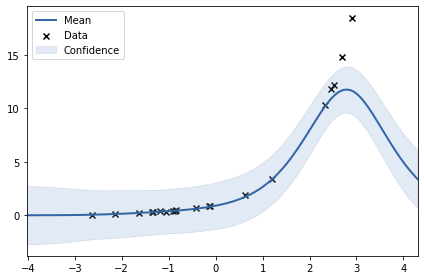

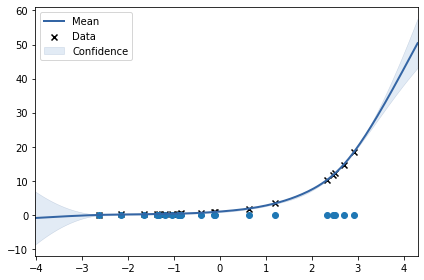

In [ ]:

import unittest
import numpy as np
import GPy

from sklearn.metrics import r2_score # metrics to evaluate the model r2_score
from sklearn.metrics import mean_absolute_error # metrics to evaluate the model mean absolute error
from sklearn.metrics import mean_squared_error # metrics to evaluate the model mean squared error
import matplotlib.pyplot as plt

# Ceate a dataset of 20 points adding 
# the dependent variable Y has a random uniform noisy
X = np.random.uniform(-3.,3.,(20,1))
Y = np.exp(X) + np.random.randn(20,1)*0.05

# We can choose different kenels including Gaussian and Matenr
# the Matern kern is a generalization of Gaussian kernel
# if you replace the Matern52 by RBF the code will work using Gaussian 
# but in both cases it is necessary to tune the parameters

#kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
#kernel = GPy.kern.Matern52(input_dim=1)

kernel = GPy.kern.src.stationary.Matern52(input_dim=1, variance = 1., lengthscale = 1.)

sig2 = kernel.variance[0] # variance du kernel
theta = kernel.lengthscale[0] # échelle du kernel

print("Les paramètres par défaut (avant optimisation) du noyau (kernel) sont : variance = {}, échelle = {}".format(sig2,theta))

# First part we define the model providing the kernel and dataset
m = GPy.models.GPRegression(X,Y,kernel, noise_var = 1.)

parameters = m._param_array_ # donne les paramètres sig2, theta, variance du bruit
noiseVar = parameters[2]

print("La variance du bruit (cas homoscédasticité) = {}".format(noiseVar))


from IPython.display import display
display(m)
fig = m.plot()



# as observed in fig the stadard deviation without parameters tune are big 
# considering the confidence interval of values estimated

m.optimize(messages=True)
# in order to have a better results the fuction optimize is defined to tune the parameters
# ps: the default method to optimize is 'bfgs' (quasi newton method)

# once the fucntion optimize is defined the parameters of krig can be optimized 
# using optimize_restart
m.optimize_restarts(num_restarts = 10)

# all possible informations present in the model can be 
# listed using dir(model_name) ps: in our case the name is m
len(dir(m))

# noise in model:
m.Gaussian_noise

m.parameters

m.param_array

fig = m.plot()
# after optimize we can observe the confidence 
# interval sugest the model is tunned 
# after tune we can observe the confidence interval suggeting values close to experimental 
# in regions where there is experimental points.

# obtaining the value of y_pred (y_mean) and standard deviation (y_std) for each point
y_mean, y_std = m.predict(X.reshape(-1, 1))
noise = Y - y_mean

plt.scatter(X,noise)

# writing the metrics:
print('r^2 score =',r2_score(Y, y_mean))
print('MAE =',mean_absolute_error(Y, y_mean))
print('MSQE =',mean_squared_error(Y, y_mean))